In [1]:
import numpy as np

<IPython.core.display.Javascript object>


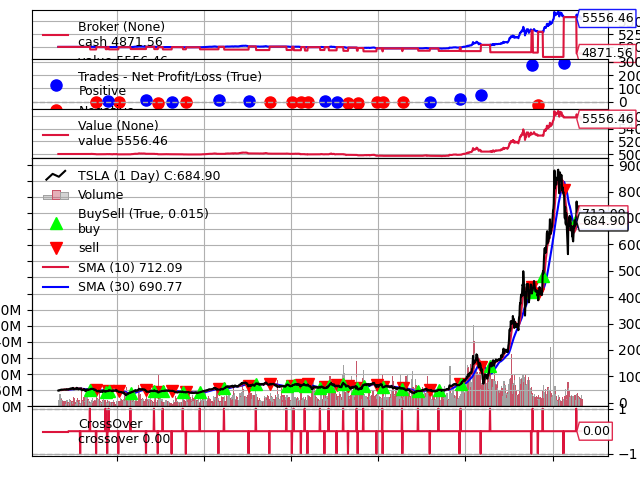

[[<Figure size 640x480 with 6 Axes>]]

In [2]:
from datetime import datetime
import backtrader as bt

# Create a subclass of Strategy to define the indicators and logic


class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
# data = bt.feeds.YahooFinanceData(dataname='MSFT',
#                                  fromdate=datetime(2011, 1, 1),
#                                  todate=datetime(2012, 12, 31))

data = bt.feeds.YahooFinanceCSVData(dataname='./daily/TSLA.csv')

cerebro.adddata(data)  # Add the data feed

cerebro.broker.setcash(5_000)
cerebro.addobserver(bt.observers.Value)

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot()  # and plot it with a single command

In [3]:
import backtrader as bt

class PrintClose(bt.Strategy):

    def __init__(self):
        #Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt}') #Print date and close

    def next(self):
        self.log('Close, %.2f' % self.dataclose[0])

#Instantiate Cerebro engine
cerebro = bt.Cerebro()

#Add data feed to Cerebro
data = bt.feeds.YahooFinanceCSVData(dataname='daily/TSLA.csv')
cerebro.adddata(data)

#Add strategy to Cerebro
cerebro.addstrategy(PrintClose)

#Run Cerebro Engine
cerebro.run()

2015-05-04 Close, 46.10
2015-05-05 Close, 46.59
2015-05-06 Close, 46.09
2015-05-07 Close, 47.36
2015-05-08 Close, 47.32
2015-05-11 Close, 47.90
2015-05-12 Close, 48.95
2015-05-13 Close, 48.64
2015-05-14 Close, 48.82
2015-05-15 Close, 49.77
2015-05-18 Close, 49.75
2015-05-19 Close, 49.43
2015-05-20 Close, 48.87
2015-05-21 Close, 49.12
2015-05-22 Close, 49.55
2015-05-26 Close, 49.49
2015-05-27 Close, 49.49
2015-05-28 Close, 50.29
2015-05-29 Close, 50.16
2015-06-01 Close, 49.89
2015-06-02 Close, 49.67
2015-06-03 Close, 49.80
2015-06-04 Close, 49.18
2015-06-05 Close, 49.83
2015-06-08 Close, 51.26
2015-06-09 Close, 51.20
2015-06-10 Close, 50.14
2015-06-11 Close, 50.28
2015-06-12 Close, 50.14
2015-06-15 Close, 50.08
2015-06-16 Close, 50.62
2015-06-17 Close, 52.08
2015-06-18 Close, 52.38
2015-06-19 Close, 52.50
2015-06-22 Close, 51.96
2015-06-23 Close, 53.53
2015-06-24 Close, 53.03
2015-06-25 Close, 53.76
2015-06-26 Close, 53.42
2015-06-29 Close, 52.40
2015-06-30 Close, 53.65
2015-07-01 Close

2019-05-09 Close, 48.40
2019-05-10 Close, 47.90
2019-05-13 Close, 45.40
2019-05-14 Close, 46.46
2019-05-15 Close, 46.39
2019-05-16 Close, 45.67
2019-05-17 Close, 42.21
2019-05-20 Close, 41.07
2019-05-21 Close, 41.02
2019-05-22 Close, 38.55
2019-05-23 Close, 39.10
2019-05-24 Close, 38.13
2019-05-28 Close, 37.74
2019-05-29 Close, 37.97
2019-05-30 Close, 37.64
2019-05-31 Close, 37.03
2019-06-03 Close, 35.79
2019-06-04 Close, 38.72
2019-06-05 Close, 39.32
2019-06-06 Close, 41.19
2019-06-07 Close, 40.90
2019-06-10 Close, 42.58
2019-06-11 Close, 43.42
2019-06-12 Close, 41.85
2019-06-13 Close, 42.78
2019-06-14 Close, 42.98
2019-06-17 Close, 45.01
2019-06-18 Close, 44.95
2019-06-19 Close, 45.29
2019-06-20 Close, 43.92
2019-06-21 Close, 44.37
2019-06-24 Close, 44.73
2019-06-25 Close, 43.95
2019-06-26 Close, 43.85
2019-06-27 Close, 44.57
2019-06-28 Close, 44.69
2019-07-01 Close, 45.43
2019-07-02 Close, 44.91
2019-07-03 Close, 46.98
2019-07-05 Close, 46.62
2019-07-08 Close, 46.07
2019-07-09 Close

In [4]:
from backtrader.indicators import Indicator, MovAv, RelativeStrengthIndex, Highest, Lowest
class StochasticRSI(Indicator):
    """
    K - The time period to be used in calculating the %K. 3 is the default.
    D - The time period to be used in calculating the %D. 3 is the default.
    RSI Length - The time period to be used in calculating the RSI
    Stochastic Length - The time period to be used in calculating the Stochastic
  
    Formula:
    %K = SMA(100 * (RSI(n) - RSI Lowest Low(n)) / (RSI HighestHigh(n) - RSI LowestLow(n)), smoothK)
    %D = SMA(%K, periodD)
  
    """
    lines = ('fastk', 'fastd',)
  
    params = (
        ('k_period', 3),
        ('d_period', 3),
        ('rsi_period', 14),
        ('stoch_period', 14),
        ('movav', MovAv.Simple),
        ('rsi', RelativeStrengthIndex),
        ('upperband', 80.0),
        ('lowerband', 20.0),
    )
  
    plotlines = dict(percD=dict(_name='%D', ls='--'),
                     percK=dict(_name='%K'))
  
    def _plotlabel(self):
        plabels = [self.p.k_period, self.p.d_period, self.p.rsi_period, self.p.stoch_period]
        plabels += [self.p.movav] * self.p.notdefault('movav')
        return plabels
  
    def _plotinit(self):
        self.plotinfo.plotyhlines = [self.p.upperband, self.p.lowerband]
  
    def __init__(self):
        rsi = bt.ind.RSI(period=self.p.rsi_period)
        rsi_ll = bt.ind.Lowest(rsi, period=self.p.rsi_period)
        rsi_hh = bt.ind.Highest(rsi, period=self.p.rsi_period)
        stochrsi = (rsi - rsi_ll) / (rsi_hh - rsi_ll)

        self.l.fastk = k = self.p.movav(100.0 * stochrsi, period=self.p.k_period)
        self.l.fastd = self.p.movav(k, period=self.p.d_period)

In [16]:
import pandas as pd
from datetime import datetime

# load csv and use row 0 as headers
df = pd.read_csv('./crypto/Binance_BTCUSDT_d.csv', header = 0)

# df = df[:10]
# 1580810400
# 1622851200000
df['unix'] = [x/1000 if x > 10000000000 else x for x in df['unix']]
dt = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S') for x in df['unix']]

df.insert(loc=0, column='datetime', value=dt)
df.drop_duplicates(subset='datetime', inplace=True)

# reverse data and save
df=df.iloc[::-1]
df.set_index('datetime', inplace=True)
df.to_csv('./crypto/reversed_BTC_d.csv')

df


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
datetime,,,,,,,,,,
2017-08-17 00:00:00,1.502928e+09,2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,647.860000,2.812379e+06,NaN
2017-08-18 00:00:00,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.070000,4.994494e+06,NaN
2017-08-19 00:00:00,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.150000,1.508239e+06,NaN
2017-08-20 00:00:00,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.540000,1.915636e+06,NaN
2017-08-21 00:00:00,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.120000,2.770592e+06,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-06-02 00:00:00,1.622592e+09,2021-06-02 00:00:00,BTC/USDT,36694.85,38225.00,35920.00,37568.68,67587.372495,2.523463e+09,1530915.0
2021-06-03 00:00:00,1.622678e+09,2021-06-03 00:00:00,BTC/USDT,37568.68,39476.00,37170.00,39246.79,75889.106011,2.930945e+09,1949658.0
2021-06-04 00:00:00,1.622765e+09,2021-06-04 00:00:00,BTC/USDT,39246.78,39289.07,35555.15,36829.00,91317.799245,3.379400e+09,1926311.0


In [77]:
from datetime import datetime
import backtrader as bt


# Create a subclass of Strategy to define the indicators and logic

class StochRSI(bt.Strategy):
    # list of parameters which are configurable for the strategy
    lines = ('stochrsi',)

    params = (
        ('stoch_k_period', 3),
        ('stoch_d_period', 3),
        ('stoch_rsi_period', 14),
        ('stoch_period', 14),
        ('stoch_upperband', 80.0),
        ('stoch_lowerband', 20.0),
        
        ('atrperiod', 14),  # ATR Period (standard)
        ('atrdist', 1),   # ATR distance for stop price

        ('size', 0.3),
        ('debug', False),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.orders = []
        self.buyprice = None
        self.buycomm = None
        
        self.atr = bt.indicators.ATR(self.data, period=self.p.atrperiod)

        self.stochrsi = StochasticRSI(k_period=self.p.stoch_k_period,
                                   d_period=self.p.stoch_d_period,
                                   rsi_period=self.p.stoch_rsi_period,
                                   stoch_period=self.p.stoch_period,
                                   upperband=self.p.stoch_upperband,
                                   lowerband=self.p.stoch_lowerband)
        
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        hh = self.datas[0].datetime.time()
        print('%s %s, %s' % (dt.isoformat(), hh, txt))

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        close = self.dataclose[0]
        
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
                self.log_trade()
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))
                
                self.log_trade()

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            self.log_trade()

        # Write down: no pending order
        self.orders = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))
        print("")
    
    def cancel_all_orders(self):
        for o in self.orders:
            self.cancel(o)
            
    def log_trade(self):
        close = self.dataclose[0]
        previousStochRSI = self.stochrsi.l.fastk[-1]
        currentStochRSI = self.stochrsi.l.fastk[0]
        self.log('Close, %.2f' % close)
        print("ATR: ", self.atr[0])
        print('previous stoch RSI:', self.stochrsi[-1])
        print('current stoch RSI:', self.stochrsi[0])
        print('fastk: ', currentStochRSI)
        print('fastd: ', self.stochrsi.l.fastd[0])
        print("")

    def next(self):        
        close = self.dataclose[0]

        previousStochRSI = self.stochrsi.l.fastk[-1]
        currentStochRSI = self.stochrsi.l.fastk[0]
        
        should_buy = (
#             self.stochrsi.l.fastk[-4] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[-3] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[-2] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[-1] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[0] >= self.p.stoch_lowerband
        )
        
        should_sell = (
#             self.stochrsi.l.fastk[-4] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[-3] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[-2] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[-1] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[0] <= self.p.stoch_upperband
        )
        
        reversal_sensitivity = 18
        
        should_stop_loss = False
        should_reverse = True
        should_detect_reversal = True
        
        if self.position.size > 0:
            if should_detect_reversal:
                if currentStochRSI > 50 and currentStochRSI < self.p.stoch_upperband:
                    # If fast crosses slow downwards, trend reversal, sell
                    if (self.stochrsi.l.fastk[-1] > self.stochrsi.l.fastd[-1] and 
                        (self.stochrsi.l.fastk[0] - self.stochrsi.l.fastd[0]) < -reversal_sensitivity):

                        self.close()
                        self.log('REVERSAL SELL CLOSE, %.2f' % self.dataclose[0])

                        if should_reverse:
                            if should_stop_loss:
                                stop_loss = close + self.p.atrdist * self.atr[0]
                                self.sell_bracket(size=self.p.size, stopprice=stop_loss)   
                            else:
                                sell_order = self.sell(size=self.p.size)
            
            if should_sell:
                self.close()

                self.log('REVERSAL SELL CREATE, %.2f' % self.dataclose[0])
                
                if should_stop_loss:
                    stop_loss = close + self.p.atrdist * self.atr[0]
                    self.sell_bracket(size=self.p.size, stopprice=stop_loss)   
                else:
                    sell_order = self.sell(size=self.p.size)
               
                
        if self.position.size < 0:
            if should_detect_reversal:
                if currentStochRSI > self.p.stoch_lowerband and currentStochRSI < 50:
                    # If fast crosses slow upwards, trend reversal, buy
                    if (self.stochrsi.l.fastk[-1] < self.stochrsi.l.fastd[-1] and 
                        (self.stochrsi.l.fastk[0] - self.stochrsi.l.fastd[0]) > reversal_sensitivity):

                        self.close()
                        self.log('REVERSAL BUY CLOSE, %.2f' % self.dataclose[0])

                        if should_reverse:
                            if should_stop_loss:                
                                stop_loss = close - self.p.atrdist * self.atr[0]
                                self.buy_bracket(size=self.p.size, stopprice=stop_loss)
                            else:
                                buy_order = self.buy(size=self.p.size)
                    
            if should_buy:
                self.close()
                self.log('REVERSAL BUY CREATE, %.2f' % self.dataclose[0])
                
                if should_stop_loss:                
                    stop_loss = close - self.p.atrdist * self.atr[0]
                    self.buy_bracket(size=self.p.size, stopprice=stop_loss)
                else:
                    buy_order = self.buy(size=self.p.size)

           
                
        if self.position.size == 0:
            if should_buy:
                self.close()
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                
                if should_stop_loss:
                    stop_loss = close - self.p.atrdist * self.atr[0]
                    self.buy_bracket(size=self.p.size, stopprice=stop_loss)
                else:
                    buy_order = self.buy(size=self.p.size)
            

            if should_sell:
                self.close()
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                
                if should_stop_loss:
                    stop_loss = close + self.p.atrdist * self.atr[0]
                    self.sell_bracket(size=self.p.size, stopprice=stop_loss)
                else:
                    sell_order = self.sell(size=self.p.size)
                

                

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(StochRSI)
    cerebro.broker.setcommission(commission=0.001)
    cerebro.broker.set_coo(True)

#     data = bt.feeds.YahooFinanceCSVData(dataname='./daily/FB.csv')
#     datapath = './daily/TSLA.csv'

    # Create a Data Feed

#     datapath = './crypto/reversed_BTC_d.csv'
    datapath = './crypto/reversed_BTC_1H.csv'
    
    data = bt.feeds.GenericCSVData(
        dataname=datapath,
        fromdate=datetime(2021,1,1),
        todate=datetime(2021,6,1),
        timeframe=bt.TimeFrame.Minutes,
#         timeframe=bt.TimeFrame.Days,
        nullvalue=0.0,
        datetime=0,
        open=4,
        high=5,
        low=6,
        close=7,
        volume=8,
        compression=60,
        headers=True,
    )

    cerebro.adddata(data)
    cerebro.broker.setcash(100000.0)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
#     cerebro.plot()
    


Starting Portfolio Value: 100000.00
2021-01-02 09:00:00, SELL CREATE, 29612.87
2021-01-02 10:00:00, SELL EXECUTED, Price: 29612.88, Cost: -8883.86, Comm 8.88
2021-01-02 10:00:00, Close, 29680.99
ATR:  271.0765145526097
previous stoch RSI: 79.58756647782273
current stoch RSI: 62.7540751855561
fastk:  62.7540751855561
fastd:  80.78054722112627

2021-01-03 21:00:00, REVERSAL BUY CREATE, 33558.34
2021-01-03 22:00:00, BUY EXECUTED, Price: 33559.06, Cost: -8883.86, Comm 10.07
2021-01-03 22:00:00, Close, 33119.14
ATR:  749.7451116809972
previous stoch RSI: 25.952690258805433
current stoch RSI: 29.993997746397678
fastk:  29.993997746397678
fastd:  23.919207588777578

2021-01-03 22:00:00, BUY EXECUTED, Price: 33559.06, Cost: 10067.72, Comm 10.07
2021-01-03 22:00:00, Close, 33119.14
ATR:  749.7451116809972
previous stoch RSI: 25.952690258805433
current stoch RSI: 29.993997746397678
fastk:  29.993997746397678
fastd:  23.919207588777578

2021-01-03 22:00:00, OPERATION PROFIT, GROSS -1183.85, NET -

2021-02-20 12:00:00, BUY EXECUTED, Price: 56355.94, Cost: -16695.35, Comm 16.91
2021-02-20 12:00:00, Close, 57291.92
ATR:  704.9244615789971
previous stoch RSI: 27.928707422389028
current stoch RSI: 52.78031957801329
fastk:  52.78031957801329
fastd:  30.864511705079195

2021-02-20 12:00:00, BUY EXECUTED, Price: 56355.94, Cost: 16906.78, Comm 16.91
2021-02-20 12:00:00, Close, 57291.92
ATR:  704.9244615789971
previous stoch RSI: 27.928707422389028
current stoch RSI: 52.78031957801329
fastk:  52.78031957801329
fastd:  30.864511705079195

2021-02-20 12:00:00, OPERATION PROFIT, GROSS -211.43, NET -245.04

2021-02-21 21:00:00, REVERSAL SELL CREATE, 57293.53
2021-02-21 22:00:00, SELL EXECUTED, Price: 57293.52, Cost: 16906.78, Comm 17.19
2021-02-21 22:00:00, Close, 57328.47
ATR:  674.4701371478097
previous stoch RSI: 47.148549168884834
current stoch RSI: 18.342163788779615
fastk:  18.342163788779615
fastd:  48.65753181996087

2021-02-21 22:00:00, SELL EXECUTED, Price: 57293.52, Cost: -17188.06

fastd:  77.16440782235391

2021-03-24 16:00:00, SELL EXECUTED, Price: 56298.12, Cost: -16889.44, Comm 16.89
2021-03-24 16:00:00, Close, 55762.89
ATR:  672.6026627931425
previous stoch RSI: 79.38076175464728
current stoch RSI: 61.29621232157101
fastk:  61.29621232157101
fastd:  77.16440782235391

2021-03-24 16:00:00, OPERATION PROFIT, GROSS 560.20, NET 526.98

2021-03-25 05:00:00, REVERSAL BUY CREATE, 52686.15
2021-03-25 06:00:00, BUY EXECUTED, Price: 52686.15, Cost: -16889.44, Comm 15.81
2021-03-25 06:00:00, Close, 52975.46
ATR:  830.0540961640896
previous stoch RSI: 22.59700601873602
current stoch RSI: 34.81902844685922
fastk:  34.81902844685922
fastd:  23.903412850334746

2021-03-25 06:00:00, BUY EXECUTED, Price: 52686.15, Cost: 15805.84, Comm 15.81
2021-03-25 06:00:00, Close, 52975.46
ATR:  830.0540961640896
previous stoch RSI: 22.59700601873602
current stoch RSI: 34.81902844685922
fastk:  34.81902844685922
fastd:  23.903412850334746

2021-03-25 06:00:00, OPERATION PROFIT, GROSS 108

2021-05-09 14:00:00, REVERSAL BUY CREATE, 57170.90
2021-05-09 15:00:00, BUY EXECUTED, Price: 57170.90, Cost: -17275.20, Comm 17.15
2021-05-09 15:00:00, Close, 57379.58
ATR:  707.5570560736586
previous stoch RSI: 24.288478171148967
current stoch RSI: 43.64263381766034
fastk:  43.64263381766034
fastd:  26.773564184037244

2021-05-09 15:00:00, BUY EXECUTED, Price: 57170.90, Cost: 17151.27, Comm 17.15
2021-05-09 15:00:00, Close, 57379.58
ATR:  707.5570560736586
previous stoch RSI: 24.288478171148967
current stoch RSI: 43.64263381766034
fastk:  43.64263381766034
fastd:  26.773564184037244

2021-05-09 15:00:00, OPERATION PROFIT, GROSS 123.93, NET 89.51

2021-05-10 06:00:00, REVERSAL SELL CREATE, 58833.93
2021-05-10 07:00:00, SELL EXECUTED, Price: 58833.92, Cost: 17151.27, Comm 17.65
2021-05-10 07:00:00, Close, 58370.17
ATR:  589.162273574717
previous stoch RSI: 76.64189126062945
current stoch RSI: 59.747775378551886
fastk:  59.747775378551886
fastd:  75.0197413462936

2021-05-10 07:00:00, SE

<IPython.core.display.Javascript object>


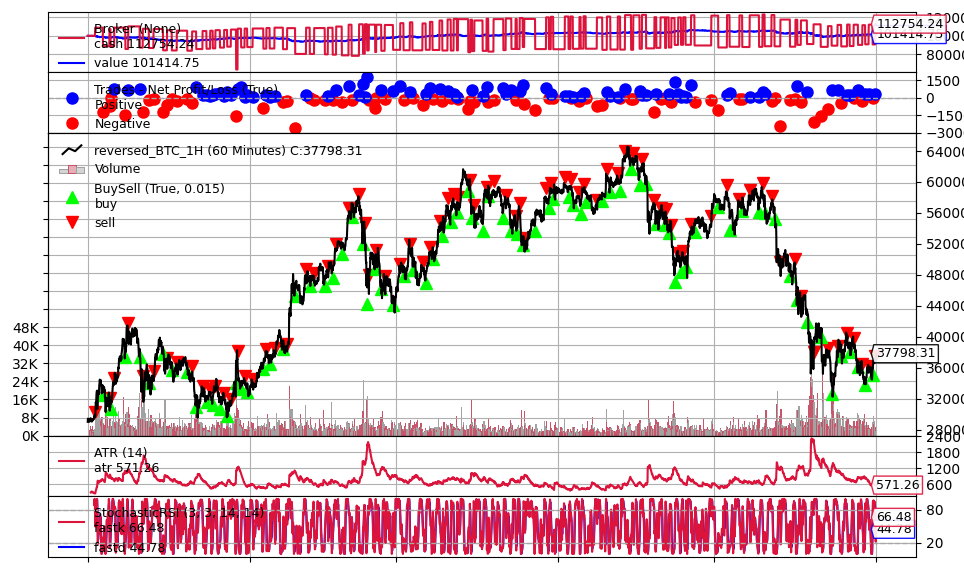

[[<Figure size 640x480 with 6 Axes>]]

In [74]:
cerebro.plot()